# [교차 검증(Cross validation)](https://scikit-learn.org/stable/modules/cross_validation.html)

> 보통 train set으로 모델을 훈련, test set으로 모델을 검증한다. 여기에는 한 가지 약점이 존재한다. 고정된 test set을 통해 모델의 성능응ㄹ 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set에만 잘 동작하는 모델이 된다.  
  
> 즉, test set에 과적합(overfitting)하게 되므로, 다른 실제 데이터를 가져와도 예측을 수행하면 맞지 않은 경우가 자주 발생하게 된다. 이를 해결하고자 하는 것이 바로 교차 검증(Cross validation)이다.

## 교차 검증 프로세스

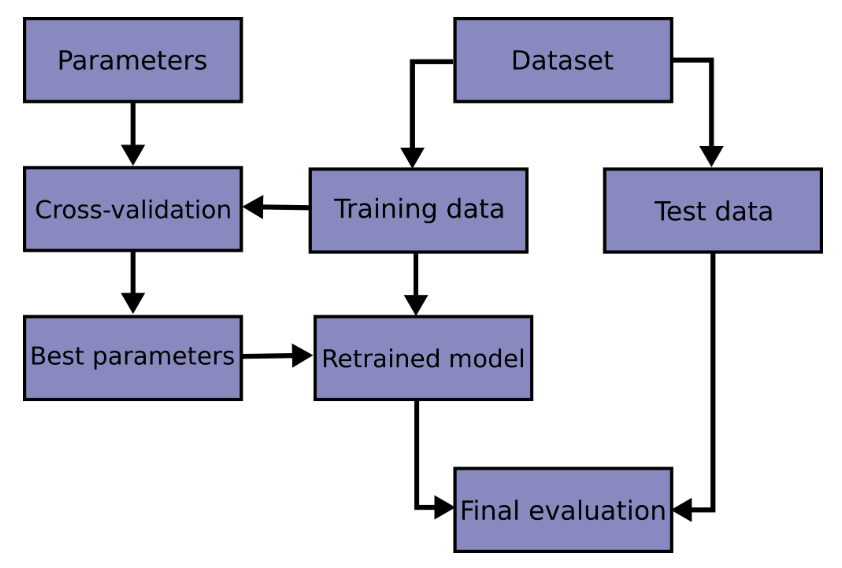

## 교차 검증의 장단점

- 장점
  - 모든 데이터셋을 훈련에 활용할 수 있다.
    - 정확도를 향상시킬 수 있다.
    - 데이터 부족으로 인한 underfitting을 방지할 수 있다.
  - 모든 데이터셋을 평가에 활용할 수 있다.
    - 평가에 사용되는 데이터 편중을 막을 수 있다.
    - 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다.
- 단점
  - Iteration 횟수가 많기 때문에 모델 훈련/평가 시간이 오래 걸린다.

## 교차 검증 기법 종류
> 교차 검증은 Training data를 어떻게 학습용과 검증용 데이터로 나눠서 학습을 진행하는지에 따라 여러 기법으로 나눠진다.  
  
> 테스트용 데이터는 학습이 끝났을 때, 사용하는 데이터이다.

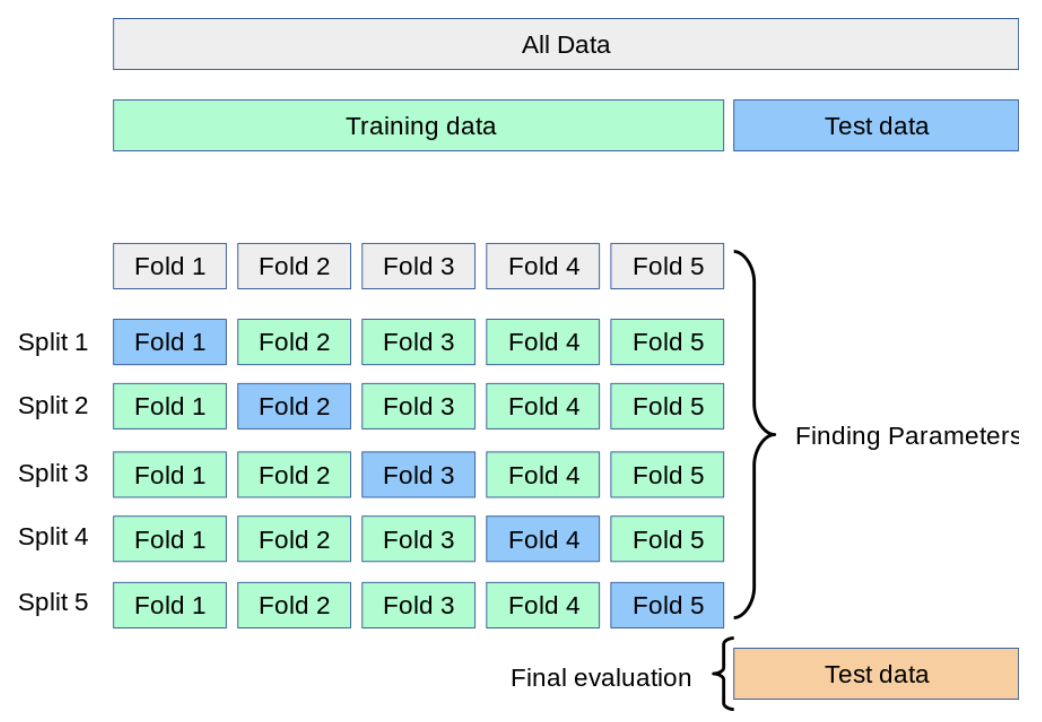

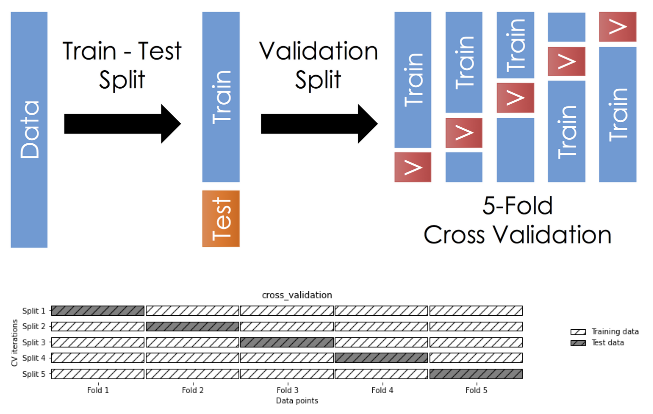

### k-fold cross validation

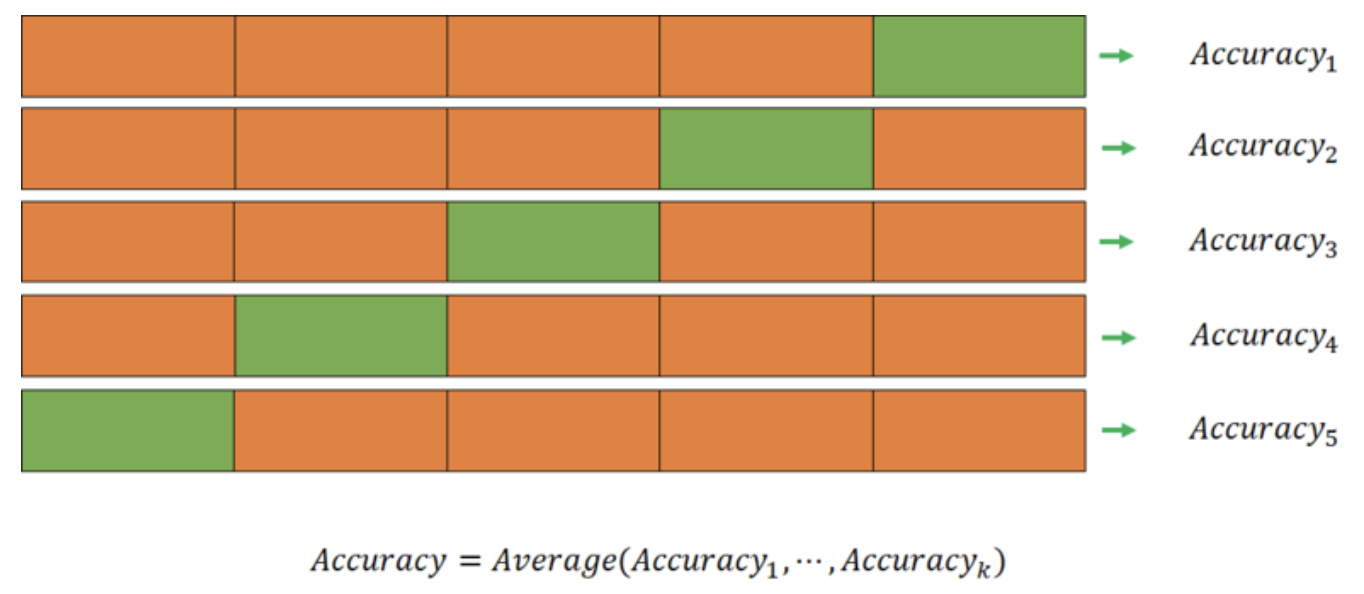

k-fold 교차 검증 방법은 가장 일반적으로 사용되는 교차 검증 방법이다. 데이터를 k개의 데이터 폴드로 분할하고, 각 Iteration마다 valid set을 다르게 할당하여 총 k개의 '데이터 폴드 세트'를 구성한다.  
  
따라서 모델을 학습 및 훈련하는데 총 k번의 Iteration이 필요한 것이 특징이다. 각 데이터 폴드 세트에 대해서 나온 검증 결과들을 평균내어 최종적인 검증 결과를 도출하는 것이 일반적이다.

### Stratified k-fold cross validation

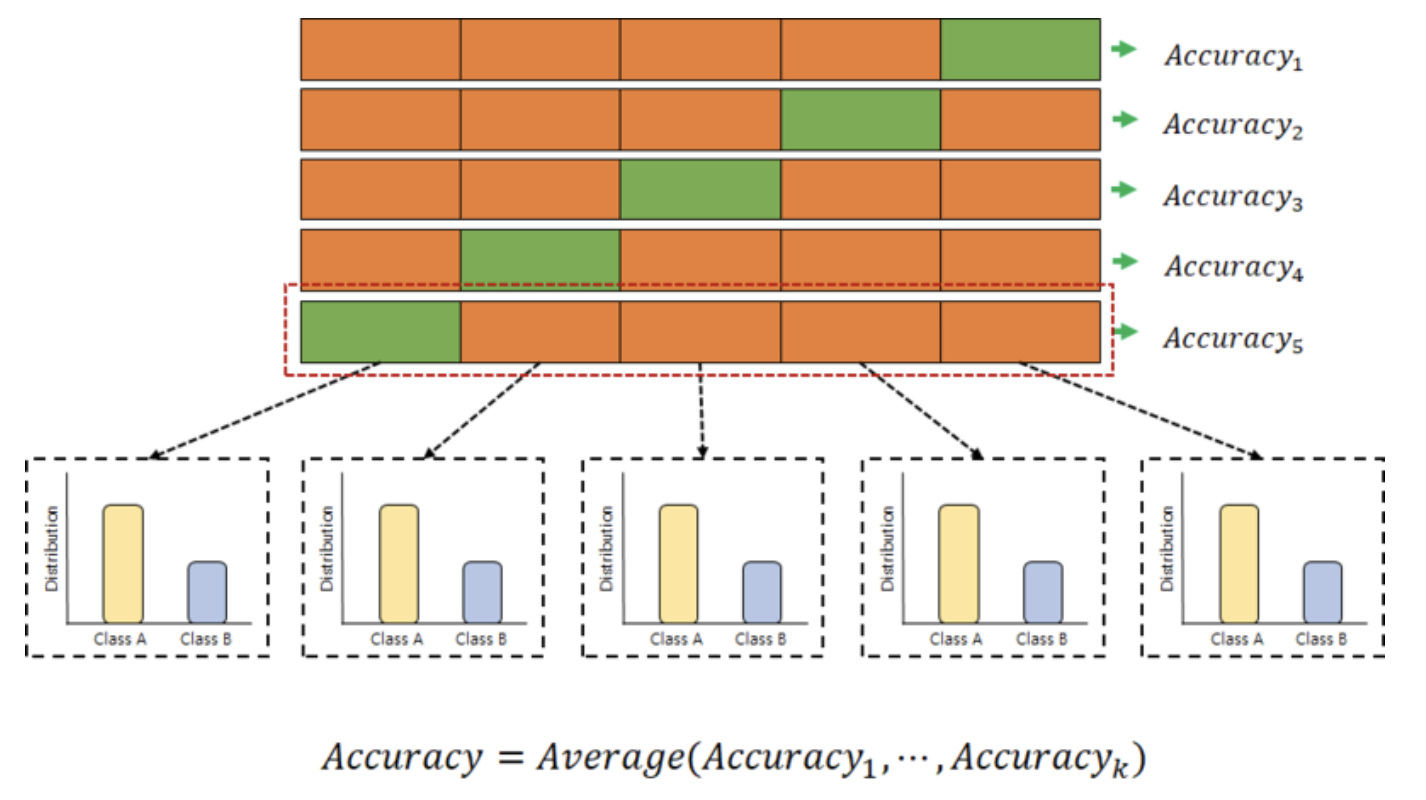

주로 Classification 문제에서 사용되며, label의 분포가 각 클래스별로 불균형을 이룰 때 유용하게 사용된다.  
label의 분포가 불균형한 상황에서 sample의 index 순으로 데이터 폴드 세트를 구성하는 것은 데이터를  검증하는데 치명적인 오류를 야기할 수 있다. Stratified k-fold cross validation은 이러한 데이터 label의 분포까지 고려해 주어서(그렇기 때문에 데이터 폴드 세트를 구성해주는 함수에서 데이터의 label 값을 요구됨), 각 훈련 또는 검증 폴드의 분포가 전체 데이터셋이 가지고 있는 분포에 근사하게 된다.

## 교차 검증 예제

### 데이터 로드

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
# 데이터 로드
iris = datasets.load_iris()

X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [ ]:
# train set, test set으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [ ]:
X_test.shape, y_test.shape

((60, 4), (60,))

### 교차 검증을 사용하지 않은 예제

In [ ]:
from sklearn import svm

In [ ]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)
# 모델 학습
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# 평가
clf.score(X_test, y_test)

0.9666666666666667

### 교차 검증을 사용한 예제

#### KFold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)

In [ ]:
# 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
cv_test = kf.split(X_train)

In [ ]:
n_iter = 0
for train_index, valid_index in cv_test:
  print(f'train_index: {train_index} \n valid_index: {valid_index}')
  if n_iter == 2:
    break

train_index: [ 0  1  3  4  5  6  9 10 11 12 14 15 17 18 19 20 21 22 23 25 27 28 29 31
 32 34 35 36 37 38 39 40 42 44 46 47 48 49 50 51 52 54 55 57 58 59 60 61
 62 64 65 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88] 
 valid_index: [ 2  7  8 13 16 24 26 30 33 41 43 45 53 56 63 66 78 89]
train_index: [ 0  1  2  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20 21 23 24 25 26 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 49 52 53 55 56 57
 58 59 60 63 64 65 66 67 68 69 70 71 72 74 76 78 81 83 84 85 86 87 88 89] 
 valid_index: [ 3  6 18 22 27 42 48 50 51 54 61 62 73 75 77 79 80 82]
train_index: [ 1  2  3  6  7  8  9 10 12 13 14 16 18 19 20 21 22 24 25 26 27 29 30 31
 32 33 36 37 39 41 42 43 44 45 46 47 48 49 50 51 53 54 56 57 58 60 61 62
 63 64 65 66 67 69 70 71 72 73 75 76 77 78 79 80 82 83 84 85 86 87 88 89] 
 valid_index: [ 0  4  5 11 15 17 23 28 34 35 38 40 52 55 59 68 74 81]
train_index: [ 0  2  3  4  5  6  7  8  9 11 12 13 15 16 17 18 21 22 23 24 25 26 27 28
 3

In [ ]:
train_x = X_train[train_index]
train_x.shape

(72, 4)

In [ ]:
valid_x = X_train[valid_index]
valid_x.shape

(18, 4)

In [ ]:
train_y = y_train[train_index]
train_y.shape

(72,)

In [ ]:
valid_y = y_train[valid_index]
valid_y.shape

(18,)

In [ ]:
clf.fit(train_x, train_y)

SVC(C=1, kernel='linear')

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in kf.split(X_train):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = X_train[train_index], X_train[valid_index]
  train_y, valid_y = y_train[train_index], y_train[valid_index]

  # 학습
  clf.fit(train_x, train_y)
  # 예측
  pred = clf.predict(valid_x)
  # 평가
  accuracy = np.round(accuracy_score(valid_y, pred), 4)
  accuracy_lst.append(accuracy)
  print(f'{n_iter} 번째 K-fold 정확도: {accuracy}, 학습데이터 크기: {train_x.shape}, 검증데이터 크기: {valid_x.shape}')

# 최종 평가
print('-'*50)
print(f'교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {clf.score(X_test, y_test)}')

1 번째 K-fold 정확도: 1.0, 학습데이터 크기: (72, 4), 검증데이터 크기: (18, 4)
2 번째 K-fold 정확도: 0.9444, 학습데이터 크기: (72, 4), 검증데이터 크기: (18, 4)
3 번째 K-fold 정확도: 0.9444, 학습데이터 크기: (72, 4), 검증데이터 크기: (18, 4)
4 번째 K-fold 정확도: 1.0, 학습데이터 크기: (72, 4), 검증데이터 크기: (18, 4)
5 번째 K-fold 정확도: 1.0, 학습데이터 크기: (72, 4), 검증데이터 크기: (18, 4)
--------------------------------------------------
교차 검증 정확도: 0.97776 / 모델 평가: 0.9666666666666667


#### StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

import pandas as pd

In [ ]:
# df_train -> features
df_train = pd.DataFrame(data=X_train, columns=iris.feature_names)
# df_train -> features & target
df_train['label'] = y_train
df_train.shape

(90, 5)

In [ ]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)

In [ ]:
# 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(df_train, df_train['label']):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  label_train = df_train['label'].iloc[train_index]
  label_valid = df_train['label'].iloc[valid_index]

  train_x, valid_x = X_train[train_index], X_train[valid_index]
  train_y, valid_y = y_train[train_index], y_train[valid_index]
  # 학습
  clf.fit(train_x, train_y)
  # 예측
  pred = clf.predict(valid_x)
  # 평가
  accuracy = np.round(accuracy_score(valid_y, pred), 4)
  accuracy_lst.append(accuracy)
  print(f'{n_iter} 번째 Stratified Stratified K-Fold 정확도: {accuracy}, 학습데이터 label 분포: \n{label_train.value_counts()}, 검증데이터 label 분포: \n{label_valid.value_counts()}')

# 최종 평가
print('-'*50)
print(f'교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {clf.score(X_test, y_test)}')

1 번째 Stratified Stratified K-Fold 정확도: 1.0, 학습데이터 label 분포: 
label
0    27
2    24
1    21
Name: count, dtype: int64, 검증데이터 label 분포: 
label
0    7
1    6
2    5
Name: count, dtype: int64
2 번째 Stratified Stratified K-Fold 정확도: 1.0, 학습데이터 label 분포: 
label
0    28
2    23
1    21
Name: count, dtype: int64, 검증데이터 label 분포: 
label
1    6
0    6
2    6
Name: count, dtype: int64
3 번째 Stratified Stratified K-Fold 정확도: 1.0, 학습데이터 label 분포: 
label
0    27
2    23
1    22
Name: count, dtype: int64, 검증데이터 label 분포: 
label
0    7
2    6
1    5
Name: count, dtype: int64
4 번째 Stratified Stratified K-Fold 정확도: 0.9444, 학습데이터 label 분포: 
label
0    27
2    23
1    22
Name: count, dtype: int64, 검증데이터 label 분포: 
label
0    7
2    6
1    5
Name: count, dtype: int64
5 번째 Stratified Stratified K-Fold 정확도: 1.0, 학습데이터 label 분포: 
label
0    27
2    23
1    22
Name: count, dtype: int64, 검증데이터 label 분포: 
label
0    7
2    6
1    5
Name: count, dtype: int64
--------------------------------------------------
교차 검증 

#### cross_val_predict()
> 만든 모델을 통해 예측한 값들을 불러와 원하는 평가 계산 방법을 적용할 수 있도록 사용

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)
# 교차 검증
predicts = cross_val_predict(clf, X_train, y_train, cv=5)
print(f'각 예측 결과과: \n:{pd.Series(predicts)}')

각 예측 결과과: 
:0     1
1     0
2     2
3     1
4     1
     ..
85    0
86    2
87    1
88    2
89    0
Length: 90, dtype: int64


#### cross_val_score()
> 평가지표로 계산된 스코어에 대한 정보들을 확인하는 방법

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)
# 교차 검증
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
print(f'각 검증 별 점수: \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수: {np.mean(scores)}')

각 검증 별 점수: 
0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    0.944444
dtype: float64
교차 검증 평균 점수: 0.9888888888888889


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 모델 정의
clf = svm.SVC(kernel='linear', C=1)
# 교차 검증
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=skf)
print(f'각 검증 별 점수: \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수: {np.mean(scores)}')

각 검증 별 점수: 
0    1.000000
1    1.000000
2    1.000000
3    0.944444
4    1.000000
dtype: float64
교차 검증 평균 점수: 0.9888888888888889


#### cross_validate()
> 여러 개의 평가지표를 사용하고 싶을 때 사용

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)
# 교차 검증
result = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)
print(f'각 검증 결과: \n: {pd.DataFrame(result)}')

각 검증 결과: 
:    fit_time  score_time  test_score  train_score
0  0.001719    0.001348    1.000000     0.986111
1  0.001489    0.001163    1.000000     1.000000
2  0.001475    0.001216    1.000000     0.986111
3  0.001630    0.001397    1.000000     0.986111
4  0.001367    0.001134    0.944444     1.000000
